<center><img src='https://drive.google.com/uc?id=1Pl06DMKpHRrRLQiuADOrZIlc9aosJYEq' height="60"></center>

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

### <br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
<br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">SKRYPT DO LABORATORIUM</style></h1>
    <h1 style = "font-size:24px">NAZWA PRZEDMIOTU</style></h1>
    <h1 style = "font-size:24px; font-weight:normal">LABORATORIUM 5:</style></h1>
    <h1 style = "font-size:24px">Podstawy Analizy Sieciowej</style></h1>
    <h1 style = "font-size:24px">dr inż. Aleksandra Karpus</style></h1>
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

<center><img src='https://drive.google.com/uc?id=1PioHCAlQTt8LWChoMysPErSOrxOfAW0R'></center>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

<hr>

# 1. Opis ćwiczenia

#### Wymagania wstępne:
Znajomość języka python.

#### Cele ćwiczenia:
Celem laboratorium jest nabycie przez studentów praktycznych umiejętności operowania na grafach/sieciach.

#### Spodziewane efekty kształcenia ‐ umiejętności i kompetencje:
[K7_U06] Student potrafi analizować grafy i sieci. Student potrafi dobrać odpowiednie miary w celu badania sieci oraz interpretować otrzymane wyniki.

#### Metody dydaktyczne:
Zadania implementacyjne.

#### Zasady oceniania/warunek zaliczenia ćwiczenia
Za ćwiczenie można otrzymać 10 punktów. Ćwiczenie uznawane jest za zaliczone, jeżeli
student zdobędzie za nie minimum 5 punktów.

#### Wykaz literatury podstawowej do ćwiczenia:
1. Materiały wykładowe do przedmiotu.
2. Dokumentacja biblioteki NetworkX.

#### Bibliografia:
1. D. Romero, <i>Applied Social Network Analysis in Python</i>, University of Michigan, Coursera, 2020.

# 2. Przebieg ćwiczenia
Podczas zajęć wykonywać będą Państwo przykłady i zadania w języku Python w formie notebooka Jupyter. Oprócz przykładów i zadań, notebook zawiera również elementy teoretyczne, w tym powtórzenie fragmentów wykładów i wprowadzenie do biblioteki NetworkX.

# 3. Wprowadzenie do ćwiczenia

In [1]:
import sys
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline

print(f"Python version {sys.version}")
print(f"networkx version: {nx.__version__}")

Python version 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]
networkx version: 3.4.2


Poniżej przedstawiono przykład tworzenia grafu poprzez wylistowanie jego krawędzi.

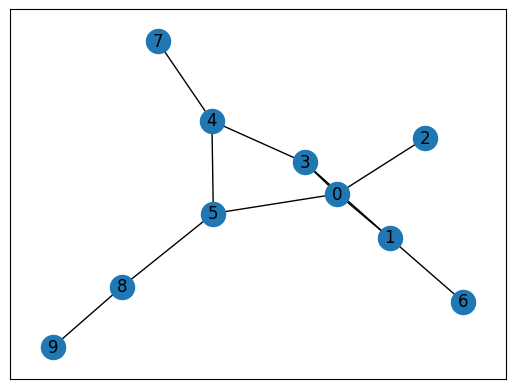

In [2]:
G1 = nx.Graph()
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

nx.draw_networkx(G1)

### Współczynnik gronowania (ang. clustering coefficient)
Współczynnik gronowania wierzchołka opisuje prawdopodobieństwo, że pierwsi sąsiedzi tego węzła są względem siebie również pierwszymi sąsiadami.
###### # Przykład 1

In [3]:
g = nx.Graph()
e = list(zip('A A A B B C C D E E F T'.split(), 'K B C C K E F E F H G J'.split()))
g.add_edges_from(e)
g.edges()

EdgeView([('A', 'K'), ('A', 'B'), ('A', 'C'), ('K', 'B'), ('B', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'F'), ('E', 'H'), ('F', 'G'), ('T', 'J')])

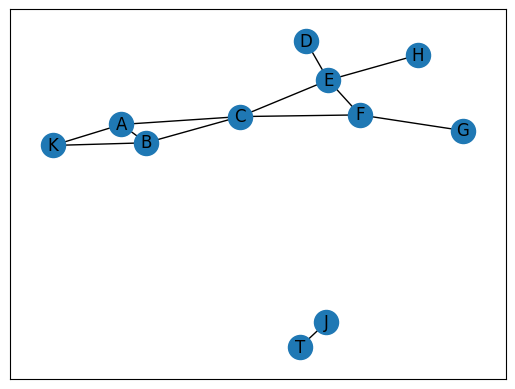

In [4]:
nx.draw_networkx(g)

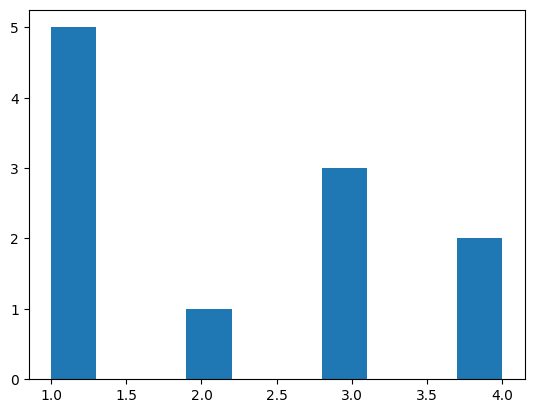

In [5]:
# funkcja rysująca rozkład stopni wierzchołków
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()
    
plot_degree_dist(g)

Lokalny współczynnik gronowania:

(Dla wierzchołków stopnia <= 2 zakładamy, że LCCoeff = 0)

In [6]:
nx.clustering(g, 'F'), nx.clustering(g, 'A'), nx.clustering(g, 'J')

(0.3333333333333333, 0.6666666666666666, 0)

Globalny współczynnik gronowania:

In [7]:
nx.average_clustering(g)

0.28787878787878785

#### Przechodniość (ang. Transitivity) 
Jest to stosunek liczby trójkątów i liczby otwartych triad w sieci.

In [8]:
nx.transitivity(g)

0.4090909090909091

### Odległości
długość ścieżki: Liczba krawędzi pomiędzy dwoma wierzchołkami.

Odległość: najmniejsza liczba krawędzi pomiędzy wierzchołkami.
###### # Przykład 2

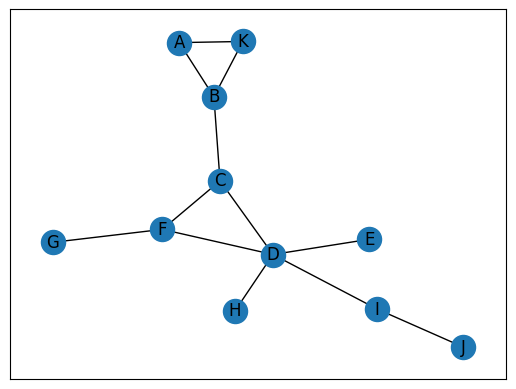

In [9]:
g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'K'),
        ('A', 'B'),
        ('B', 'K'),
        ('B', 'C'),
        ('C', 'F'),
        ('C', 'D'),
        ('F', 'D'),
        ('F', 'G'),
        ('D', 'E'),
        ('D', 'H'),
        ('D', 'I'),
        ('I', 'J')
    ]
)
nx.draw_networkx(g)

Szukamy najkrótszej ścieżki pomiędzy wierzchołkami `A` i `H`.

In [10]:
nx.shortest_path(g, 'A', 'H')

['A', 'B', 'C', 'D', 'H']

Sprawdzamy długość tej ścieżki.

In [11]:
nx.shortest_path_length(g, 'A', 'H')

4

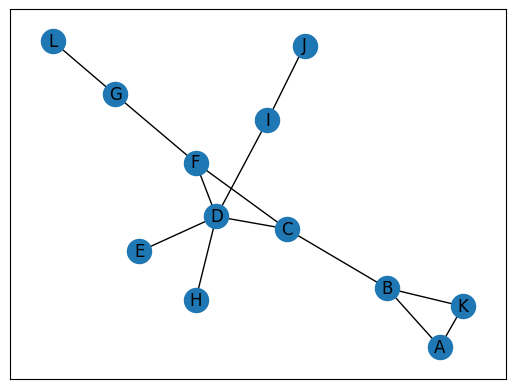

In [12]:
g.add_edges_from(
    [
        ('G', 'L')
    ]
)
nx.draw_networkx(g)

Średnia odległość:

In [13]:
nx.average_shortest_path_length(g)

2.712121212121212

Średnica (ang. diameter): najwieksza możliwa odległość pomiędzy dwoma wierzchołkami

In [14]:
nx.diameter(g)

5

Mimośród (ang. eccentricity): dległość danego wierzchołka do najbardziej oddalonego wierzchołka w grafie

In [15]:
nx.eccentricity(g)

{'A': 5,
 'K': 5,
 'B': 4,
 'C': 3,
 'F': 3,
 'D': 3,
 'G': 4,
 'E': 4,
 'H': 4,
 'I': 4,
 'J': 5,
 'L': 5}

In [17]:
nx.eccentricity(g,'H')

4

Promień (ang. radius): najmniejszy mimośród grafu

In [18]:
nx.radius(g)

3

Obrzeże (ang. periphery): Zbiór wierzchołków, których mimośród jest równy średnicy grafu.

In [19]:
nx.periphery(g)

['A', 'K', 'J', 'L']

Centrum (ang. center): Zbiór wierzchołków, których mimośród jest równy promieniowi grafu.

In [20]:
nx.center(g)

['C', 'F', 'D']

### Spójność grafu
Graf nieskierowany jest spójny, jeśli istnieje ścieżka łącząca każdą parę wierzchołków.
###### # Przykład 3

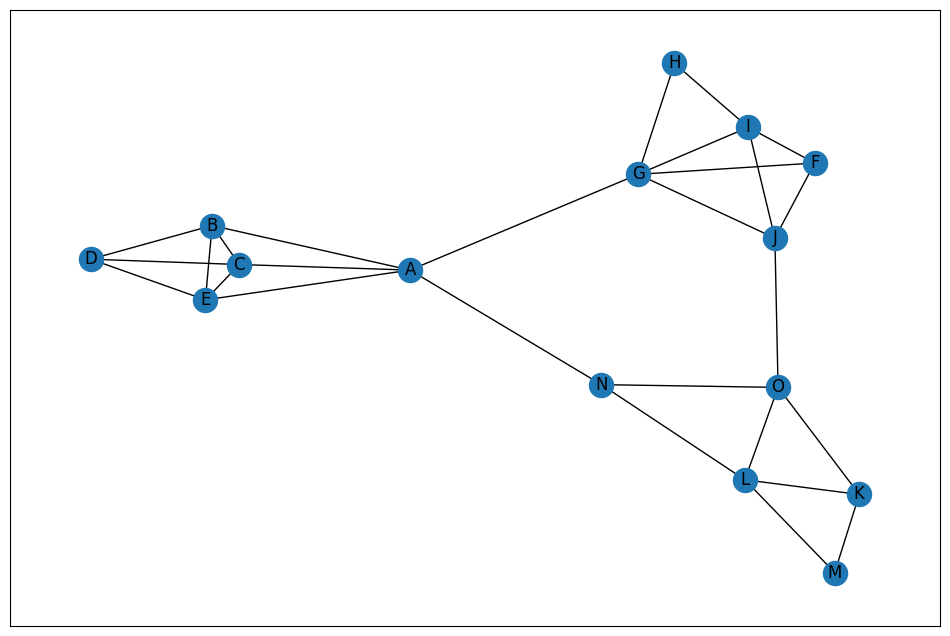

In [21]:
g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'B'), ('A', 'E'), ('A', 'C'), ('A', 'N'), ('A', 'G'),
        ('B', 'A'), ('B', 'C'), ('B', 'D'), ('B', 'E'),
        ('C', 'A'), ('C', 'B'), ('C', 'D'), ('C', 'E'),
        ('D', 'C'), ('D', 'B'), ('D', 'E'),
        ('E', 'D'), ('E', 'C'), ('E', 'B'), ('E', 'A'),
        ('F', 'G'), ('F', 'I'), ('F', 'J'),        
        ('G', 'A'), ('G', 'F'), ('G', 'I'), ('G', 'H'),
        ('H', 'G'), ('H', 'I'),
        ('I', 'H'), ('I', 'G'), ('I', 'F'), ('I', 'J'),
        ('J', 'F'), ('J', 'G'), ('J', 'I'), ('J', 'O'),
        ('K', 'L'), ('K', 'M'), ('K', 'O'),
        ('L', 'K'), ('L', 'O'), ('L', 'M'), ('L', 'N'),
        ('M', 'L'), ('M', 'K'),
        ('N', 'A'), ('N', 'L'), ('N', 'O'),
    ]
)
plt.figure(figsize=(12,8))
nx.draw_networkx(g)

In [22]:
# sprawdzenie, czy graf jest spójny
nx.is_connected(g)

True

###### # Przykład 4

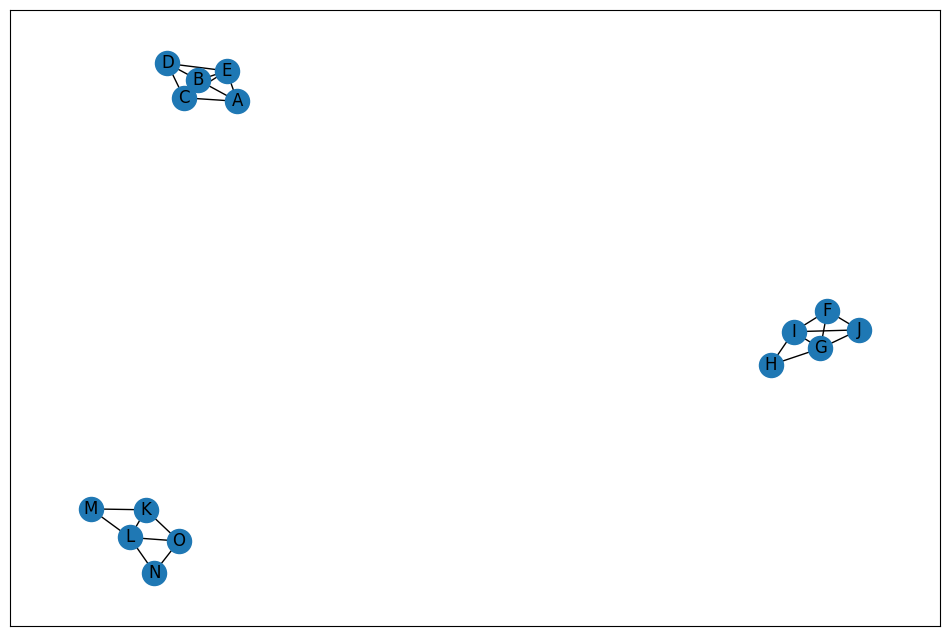

In [23]:
# Utworzenie kopii grafu g
g_un = g.copy()
# Usunięcie 3 krawędzi
g_un.remove_edge('A','G')
g_un.remove_edge('A','N')
g_un.remove_edge('O','J')

plt.figure(figsize=(12,8))
nx.draw_networkx(g_un)

In [24]:
nx.is_connected(g_un)

False

Spójna składowa (ang. connected component): spójny podgraf grafu G nie zawarty w większym podgrafie spójnym grafu G. Innymi słowy spójna składowa grafu jest to taki podgraf, który można ‘wydzielić’ z całego grafu bez usuwania krawędzi. Graf spójny ma jedną spójna składową.

In [25]:
nx.number_connected_components(g_un)

3

In [26]:
sorted(nx.connected_components(g_un))

[{'A', 'B', 'C', 'D', 'E'},
 {'K', 'L', 'M', 'N', 'O'},
 {'F', 'G', 'H', 'I', 'J'}]

In [27]:
nx.node_connected_component(g_un, 'A')

{'A', 'B', 'C', 'D', 'E'}

In [28]:
nx.node_connected_component(g_un, 'H')

{'F', 'G', 'H', 'I', 'J'}

In [29]:
nx.node_connected_component(g_un, 'M')

{'K', 'L', 'M', 'N', 'O'}

### Niezawodność sieci (ang. *robustness*)
Zdolność do zachowania ogólnych właściwości strukturalnych w sytuacjach awarii lub ataków (np. usunięcie krawędzi)

###### # Przykład 5

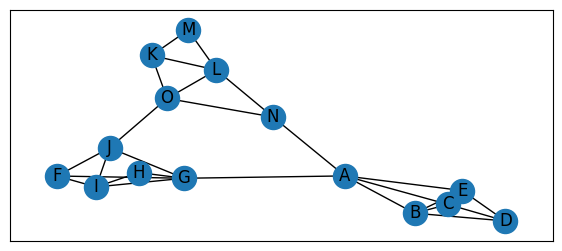

In [30]:
plt.figure(figsize=(7,3))
nx.draw_networkx(g)

In [31]:
nx.node_connectivity(g), nx.minimum_node_cut(g)

(1, {'A'})

In [32]:
nx.edge_connectivity(g), nx.minimum_edge_cut(g)

(2, {('G', 'A'), ('N', 'A')})

Niezawodne (ang. *robust*) sieci cechują się dużymi minimalnymi obcięciami wierzchołków i krawędzi, tzn. trzeba usunąć dużo wierzchołków/krawędzi, aby graf przestał być spójny.

In [33]:
sorted(nx.all_simple_paths(g, 'G', 'L'))

[['G', 'A', 'N', 'L'],
 ['G', 'A', 'N', 'O', 'K', 'L'],
 ['G', 'A', 'N', 'O', 'K', 'M', 'L'],
 ['G', 'A', 'N', 'O', 'L'],
 ['G', 'F', 'I', 'J', 'O', 'K', 'L'],
 ['G', 'F', 'I', 'J', 'O', 'K', 'M', 'L'],
 ['G', 'F', 'I', 'J', 'O', 'L'],
 ['G', 'F', 'I', 'J', 'O', 'N', 'L'],
 ['G', 'F', 'J', 'O', 'K', 'L'],
 ['G', 'F', 'J', 'O', 'K', 'M', 'L'],
 ['G', 'F', 'J', 'O', 'L'],
 ['G', 'F', 'J', 'O', 'N', 'L'],
 ['G', 'H', 'I', 'F', 'J', 'O', 'K', 'L'],
 ['G', 'H', 'I', 'F', 'J', 'O', 'K', 'M', 'L'],
 ['G', 'H', 'I', 'F', 'J', 'O', 'L'],
 ['G', 'H', 'I', 'F', 'J', 'O', 'N', 'L'],
 ['G', 'H', 'I', 'J', 'O', 'K', 'L'],
 ['G', 'H', 'I', 'J', 'O', 'K', 'M', 'L'],
 ['G', 'H', 'I', 'J', 'O', 'L'],
 ['G', 'H', 'I', 'J', 'O', 'N', 'L'],
 ['G', 'I', 'F', 'J', 'O', 'K', 'L'],
 ['G', 'I', 'F', 'J', 'O', 'K', 'M', 'L'],
 ['G', 'I', 'F', 'J', 'O', 'L'],
 ['G', 'I', 'F', 'J', 'O', 'N', 'L'],
 ['G', 'I', 'J', 'O', 'K', 'L'],
 ['G', 'I', 'J', 'O', 'K', 'M', 'L'],
 ['G', 'I', 'J', 'O', 'L'],
 ['G', 'I', 'J', 'O

### Wizualizacja grafów
Grafy możemy wizualizować z wykorzystaniem różnych układów. Poniżej zostały wylistowane wszystkie dostępne układy wraz z kilkoma przykładami wizualizacji.

In [34]:
layouts = [x for x in nx.__dir__() if x.endswith('_layout')]
layouts

['bipartite_layout',
 'circular_layout',
 'forceatlas2_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout',
 'bfs_layout',
 'arf_layout']

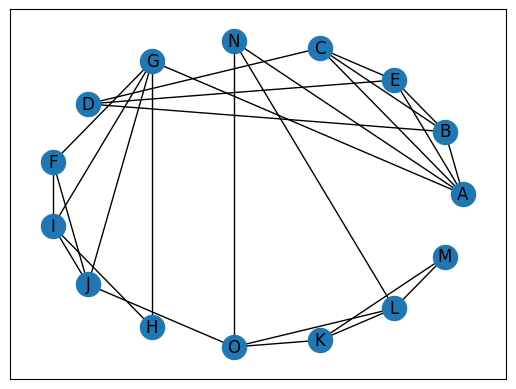

In [35]:
pos = nx.circular_layout(g)
nx.draw_networkx(g, pos)

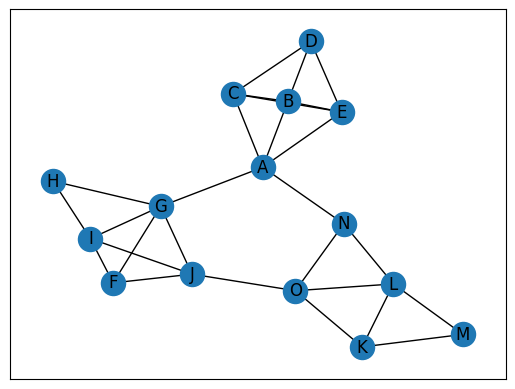

In [36]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

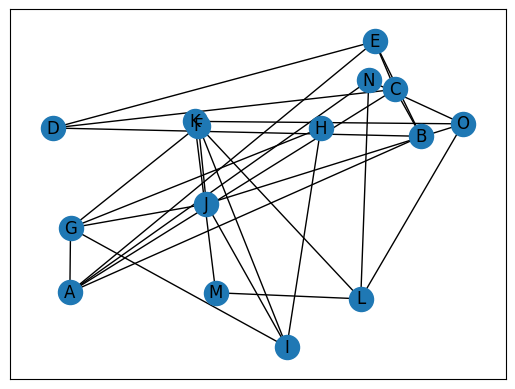

In [37]:
pos = nx.random_layout(g) 
nx.draw_networkx(g, pos)

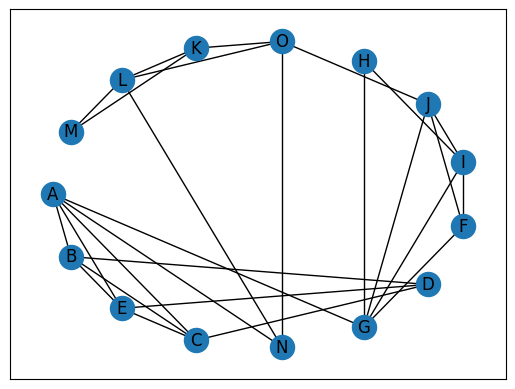

In [38]:
pos = nx.shell_layout(g)
nx.draw_networkx(g, pos)

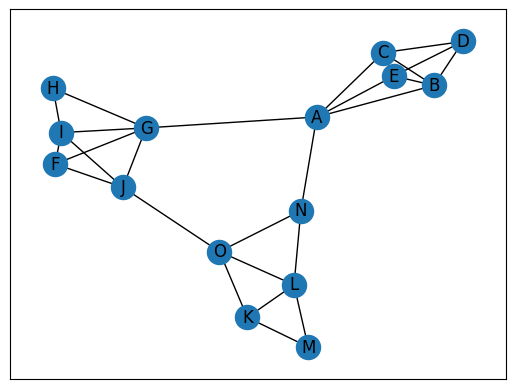

In [39]:
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos)

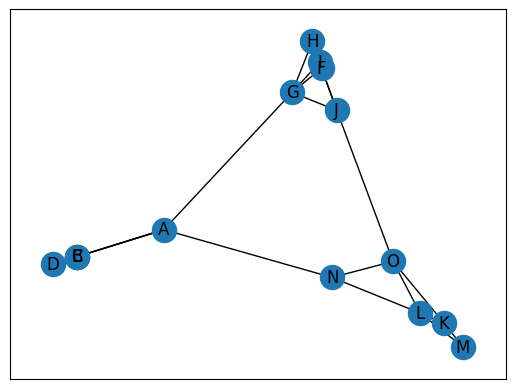

In [40]:
pos = nx.spectral_layout(g)
nx.draw_networkx(g, pos)

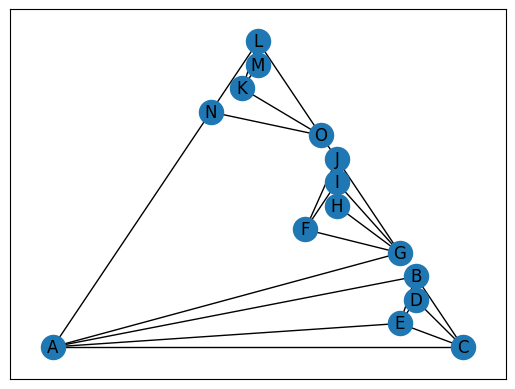

In [41]:
pos = nx.planar_layout(g)
nx.draw_networkx(g, pos)

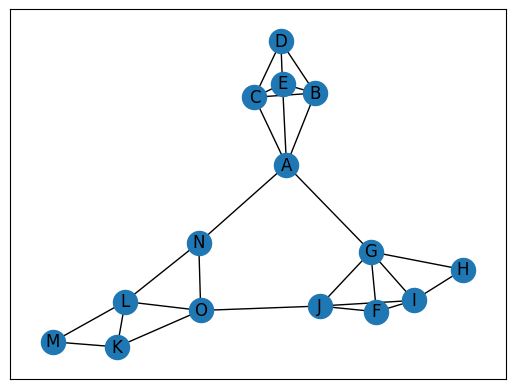

In [42]:
pos = nx.fruchterman_reingold_layout(g)
nx.draw_networkx(g, pos)

### Miary centralności
#### Centralność stopnia
Identyfikuje najważniejsze węzły w sieci
- Sieć nieskierowana: stopień
- Sieć skierowana: stopień wejściowy i/lub stopień wyjściowy 
Sieć nieskierowana: 

```Centralność_stopnia(v) = stopień(v) / (|wszystkie wierzchołki| - 1)```

```0 <= Centralność_stopnia <= 1```

###### # Przykład 6

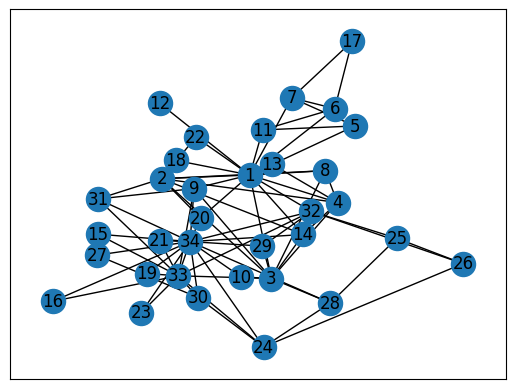

In [43]:
g = nx.karate_club_graph()
g = nx.convert_node_labels_to_integers(g, first_label=1)
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [44]:
nx.center(g)

[1, 2, 3, 4, 9, 14, 20, 32]

In [45]:
nx.degree_centrality(g)[34]

0.5151515151515151

In [46]:
nx.degree_centrality(g)[33]

0.36363636363636365

###### # Przykład 7

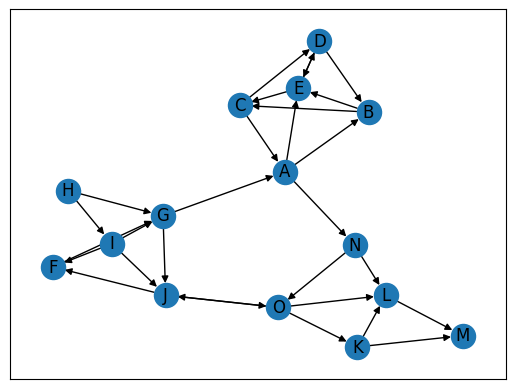

In [47]:
gd = nx.MultiDiGraph()
e = [
        ('A', 'B'), ('A', 'E'), ('A', 'N'),
        ('B', 'C'), ('B', 'E'),
        ('C', 'A'), ('C', 'D'),
        ('D', 'B'), ('D', 'E'),
        ('E', 'D'), ('E', 'C'),
        ('F', 'G'),
        ('G', 'A'), ('G', 'J'),
        ('H', 'G'), ('H', 'I'),
        ('I', 'G'), ('I', 'F'), ('I', 'J'),
        ('J', 'F'), ('J', 'O'),
        ('K', 'L'), ('K', 'M'),
        ('L', 'M'),
        ('N', 'L'), ('N', 'O'),
        ('O', 'K'), ('O', 'L'),('O','J')
    ]
gd.add_edges_from(e)
pos = nx.kamada_kawai_layout(gd)
nx.draw_networkx(gd, pos)

In [48]:
i = nx.in_degree_centrality(gd)
o = nx.out_degree_centrality(gd)
i['A'], o['A']

(0.14285714285714285, 0.21428571428571427)

### Centralność bliskości
Istotne wierzchołki leżą blisko innych wierzchołków.

###### # Przykład 8

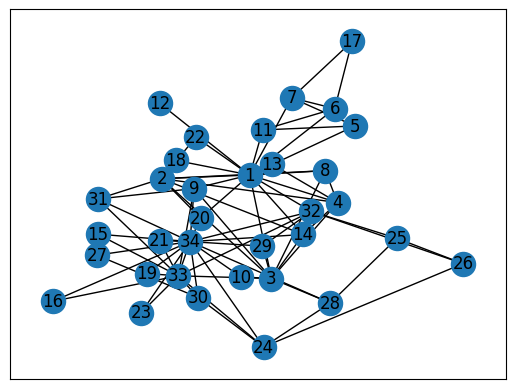

In [49]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [50]:
cc = nx.closeness_centrality(g)
cc[32]

0.5409836065573771

In [51]:
sum(nx.shortest_path_length(g, 32).values())

61

###### # Przykład 9


In [52]:
nx.closeness_centrality(gd)

{'A': 0.32010582010582006,
 'B': 0.2700892857142857,
 'E': 0.27880184331797236,
 'N': 0.26190476190476186,
 'C': 0.2216117216117216,
 'D': 0.2216117216117216,
 'F': 0.2216117216117216,
 'G': 0.19206349206349205,
 'J': 0.2700892857142857,
 'H': 0.0,
 'I': 0.07142857142857142,
 'O': 0.28809523809523807,
 'K': 0.24489795918367344,
 'L': 0.32625482625482627,
 'M': 0.28}

In [53]:
nx.closeness_centrality(gd)['L']

0.32625482625482627

### Centralność pośredniczości

Wierzchołek `n` ma wysoką centralność pośredniczości, jeśli pojawia się wiele razy na najkrótszych ścieżkach między węzłami `u` i `v`. 

Możemy uwzględnić lub wykluczyć wierzchołek `n` jako wierzchołek brzegowy (ang. *endpoint*).

Rozważamy centralność pośredniczości tylko dla wierzchołków, do których można dotrzeć.

###### # Przykład 10

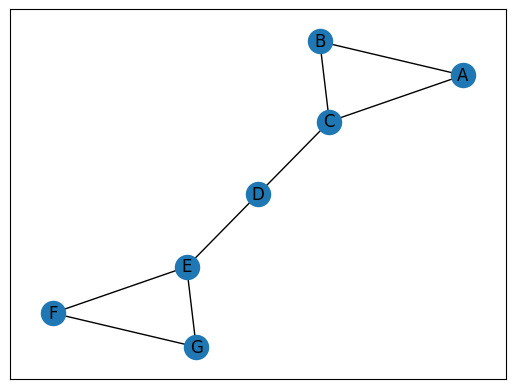

In [54]:
g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'B'), ('A', 'C'),
        ('B', 'C'),
        ('C', 'D'),
        ('D', 'E'),
        ('E', 'F'), ('E', 'G'),
        ('F', 'G')
    ]
)
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [55]:
bcc = nx.betweenness_centrality(G=g, endpoints=False)
bcc

{'A': 0.0,
 'B': 0.0,
 'C': 0.5333333333333333,
 'D': 0.6,
 'E': 0.5333333333333333,
 'F': 0.0,
 'G': 0.0}

In [56]:
def maxKeyVal(x: dict):
    keys = list(x.keys())
    values = list(x.values())
    return keys[values.index(max(values))], max(list(x.values()))

def minKeyVal(x: dict):
    keys = list(x.keys())
    values = list(x.values())
    return keys[values.index(min(values))], min(list(x.values()))

maxKeyVal(bcc), minKeyVal(bcc)

(('D', 0.6), ('A', 0.0))

###### # Przykład 11

In [57]:
bcc = nx.betweenness_centrality(G=g, endpoints=True)
bcc

{'A': 0.2857142857142857,
 'B': 0.2857142857142857,
 'C': 0.6666666666666666,
 'D': 0.7142857142857142,
 'E': 0.6666666666666666,
 'F': 0.2857142857142857,
 'G': 0.2857142857142857}

In [58]:
maxKeyVal(bcc), minKeyVal(bcc)

(('D', 0.7142857142857142), ('A', 0.2857142857142857))

## Zadania

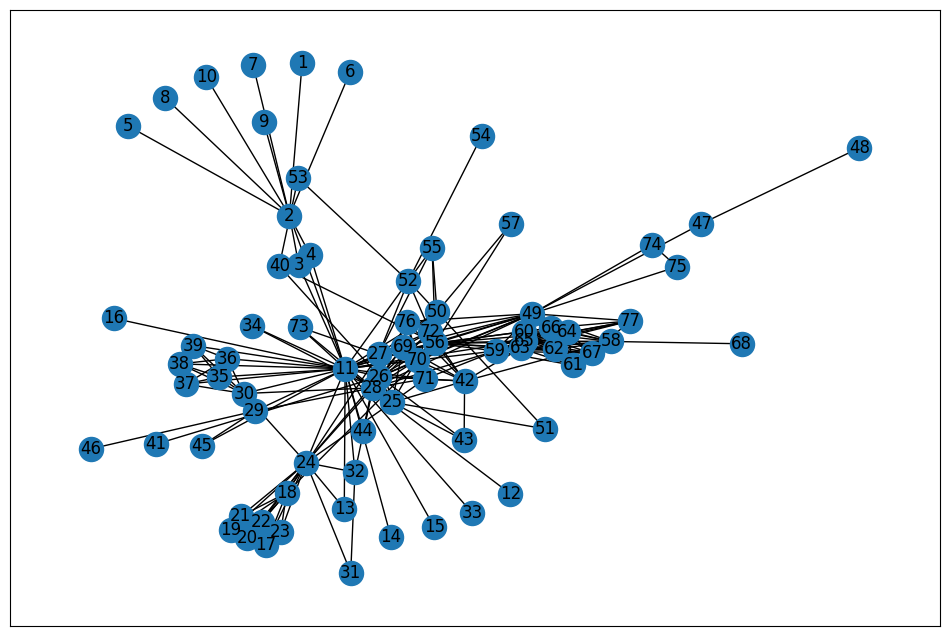

In [59]:
G = nx.les_miserables_graph()
G = nx.convert_node_labels_to_integers(G, first_label=1)
plt.figure(figsize=(12,8))
nx.draw_networkx(G)

### Zadanie 1 (2 pkt)
Napisz funkcję, która zwraca promień, średnicę, centrum i obrzeże grafu `G`.

In [61]:
def info(graph):
    rad = nx.radius(graph)
    dia = nx.diameter(graph)
    center = nx.center(graph)
    per = nx.periphery(graph)
    return f"Radius: {rad}, Diameter: {dia}, Center: {center}, Periphery: {per}"
print(info(G))

Radius: 3, Diameter: 5, Center: [11, 26, 28, 49, 56, 59, 65, 69, 70, 72], Periphery: [1, 5, 6, 7, 8, 9, 10, 17, 19, 20, 21, 22, 23, 31, 46, 48, 51, 53, 54, 68]


### Zadanie 2 (1 pkt)
Wyznacz lokalny współczynnik gronowania dla dwóch wierzchołków: po jednym z centrum i obrzeża grafu `G`.

In [76]:
def clustering_coefficient_manual(G, node):
    neighbors = list(G.neighbors(node))
    kv = len(neighbors)
    if kv < 2:
        return 0.0

    edges_between_neighbors = 0
    for i in range(kv):
        for j in range(i + 1, kv):
            if G.has_edge(neighbors[i], neighbors[j]):
                edges_between_neighbors += 1
    
    return 2 * edges_between_neighbors / (kv * (kv - 1))

print(f"{nx.clustering(G, 50)} - {clustering_coefficient_manual(G, 50)}")
print(f"{nx.clustering(G, 68)} - {clustering_coefficient_manual(G, 68)}")

0.47619047619047616 - 0.47619047619047616
0 - 0.0


### Zadanie 3 (1 pkt)
Napisz funkcję, która zwraca globalny współczynnik gronowania oraz przechodniość grafu `G`.

In [77]:
def GCCoef_Trans(graph):
    nx.average_clustering(graph)
    nx.transitivity(graph)
    return f"Avg. clustering: {nx.average_clustering(graph)}, Transitivity: {nx.transitivity(graph)}"
print(GCCoef_Trans(G))

Avg. clustering: 0.5731367499320134, Transitivity: 0.49893162393162394


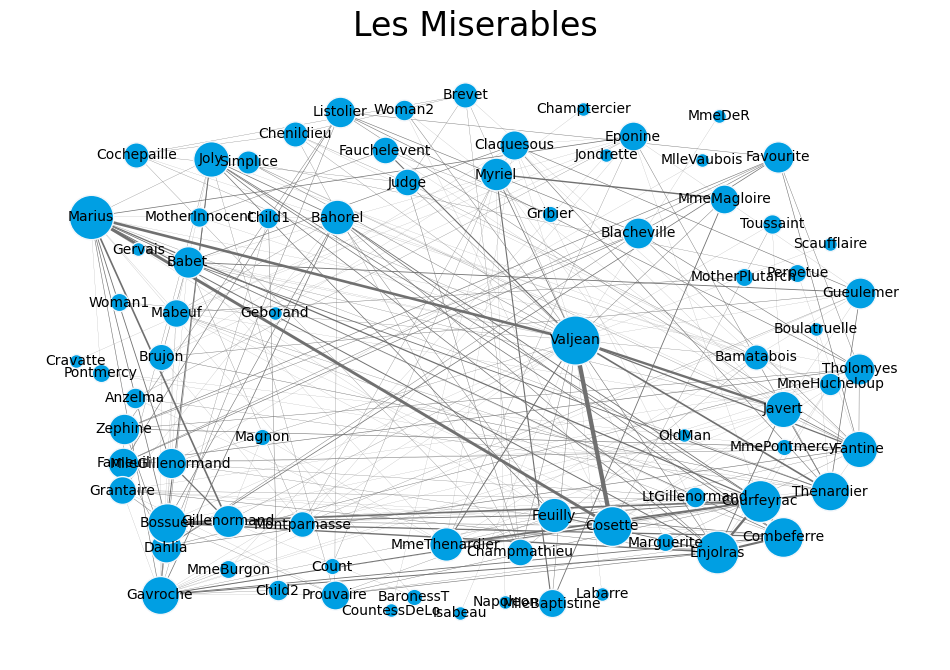

In [78]:
G = nx.les_miserables_graph()
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G,weight='weight',iterations=10, k = 2)
weighted_degrees = dict(nx.degree(G,weight='weight'))
plt.axis('off')
plt.title('Les Miserables',fontsize = 24)


for node in G.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(G,pos,{n:n.replace('-','\n') for n in G.nodes() if weighted_degrees[n]>0},font_size=10);

for e in G.edges(data=True):
    nx.draw_networkx_edges(G,pos,[e],width=e[2]['weight']/10,edge_color='#707070')

### Zadanie 4 (1 pkt)
Wyznacz średnicę grafu i znajdź wszystkie pary wierzchołków, które łączy najkrótsza ścieżka o długości średnicy grafu.

In [86]:
diameter = nx.diameter(G)
print(f"Średnica grafu: {diameter}")

print(G.nodes())
for i in range(len(G.nodes())):
    for j in range(i + 1, len(G.nodes())):
        u = list(G.nodes())[i]
        v = list(G.nodes())[j]
        if nx.shortest_path_length(G, u, v) == diameter:
            print(f"({u}, {v})")

Średnica grafu: 5
['Napoleon', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']

### Zadanie 5 (1 pkt)
Napisz funkcję badającą niezawodność sieci. Weź pod uwagę zarówno krawędzie, jak i wierzchołki.

In [89]:
def is_robust(graph):
    node_conn = nx.node_connectivity(graph)
    edge_conn = nx.edge_connectivity(graph)
    min_node_cut = nx.minimum_node_cut(graph)
    min_edge_cut = nx.minimum_edge_cut(graph)
    return f"Node connectivity: {node_conn}, Edge connectivity: {edge_conn}, Minimum node cut: {min_node_cut}, Minimum edge cut: {min_edge_cut}"
print(is_robust(G))

Node connectivity: 1, Edge connectivity: 1, Minimum node cut: {'Valjean'}, Minimum edge cut: {('OldMan', 'Myriel')}


### Zadanie 6 (1 pkt)
Utwórz kopię grafu `G` i nazwij ją `H`. Usuń z grafu `H` minimalną liczbę krawędzi potrzebną do rozspójnienia grafu `G`. Z ilu spójnych składowych będzie się składać po tej modyfikacji?

Spójne składowe po usunięciu węzłów z minimalnego cięcia: 7


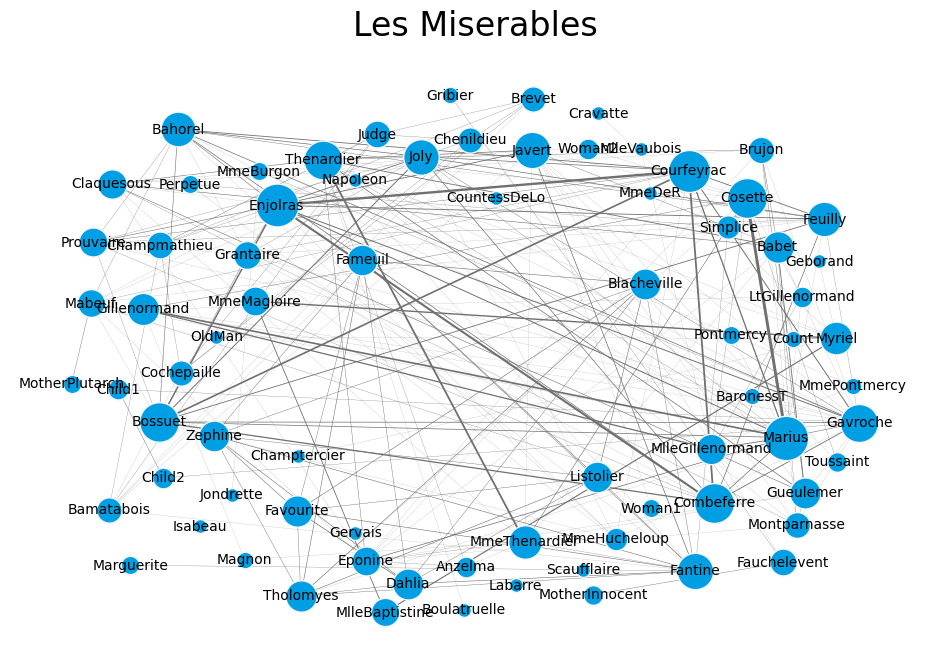

In [91]:
import copy

H = copy.deepcopy(G)
min_node_cut = nx.minimum_node_cut(H)
for node in min_node_cut:
    H.remove_node(node)

print("Spójne składowe po usunięciu węzłów z minimalnego cięcia:", nx.number_connected_components(H))

plt.figure(figsize=(12,8))
pos = nx.spring_layout(H,weight='weight',iterations=10, k = 2)
weighted_degrees = dict(nx.degree(G,weight='weight'))
plt.axis('off')
plt.title('Les Miserables',fontsize = 24)


for node in H.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(H,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(H,pos,{n:n.replace('-','\n') for n in H.nodes() if weighted_degrees[n]>0},font_size=10);

for e in H.edges(data=True):
    nx.draw_networkx_edges(H,pos,[e],width=e[2]['weight']/10,edge_color='#707070')

### Zadanie 7 (0,5 pkt)

Załóżmy, że wracasz z frontu z ważną wiadomością dotyczącą wojny i z braku czasu możesz podzielić się tą wiadomością tylko z jedną osobą. Oczekuje sie, że osoba, która otrzyma wiadomość, przekaże ją wszystkim znanym sobie osobom. Ważne jest, aby nieprzekształcona wiadomość trafiła do jak największej liczby osób. Wiadomość łatwo przeinaczyć, dlatego nieprzekształcona może przejść tylko jeden krok, co oznacza, że jeśli wiadomość przejedzie więcej niż jeden krok w tej sieci, straci sens. Skorzystaj z miary centralności.

In [97]:
def maxKeyVal(x: dict):
    keys = list(x.keys())
    values = list(x.values())
    return keys[values.index(max(values))], max(list(x.values()))

def minKeyVal(x: dict):
    keys = list(x.keys())
    values = list(x.values())
    return keys[values.index(min(values))], min(list(x.values()))

centralnosc = nx.degree_centrality(H)
print(centralnosc)
print("Dla grafu H wybiorę: ", maxKeyVal(centralnosc))


{'Napoleon': 0.013333333333333334, 'Myriel': 0.12000000000000001, 'MlleBaptistine': 0.02666666666666667, 'MmeMagloire': 0.02666666666666667, 'CountessDeLo': 0.013333333333333334, 'Geborand': 0.013333333333333334, 'Champtercier': 0.013333333333333334, 'Cravatte': 0.013333333333333334, 'Count': 0.013333333333333334, 'OldMan': 0.013333333333333334, 'Labarre': 0.0, 'Marguerite': 0.013333333333333334, 'MmeDeR': 0.0, 'Isabeau': 0.0, 'Gervais': 0.0, 'Listolier': 0.09333333333333334, 'Tholomyes': 0.12000000000000001, 'Fameuil': 0.09333333333333334, 'Blacheville': 0.09333333333333334, 'Favourite': 0.09333333333333334, 'Dahlia': 0.09333333333333334, 'Zephine': 0.09333333333333334, 'Fantine': 0.18666666666666668, 'MmeThenardier': 0.13333333333333333, 'Thenardier': 0.2, 'Cosette': 0.13333333333333333, 'Javert': 0.21333333333333335, 'Fauchelevent': 0.04, 'Bamatabois': 0.09333333333333334, 'Perpetue': 0.02666666666666667, 'Simplice': 0.04, 'Scaufflaire': 0.0, 'Woman1': 0.013333333333333334, 'Judge':

### Zadanie 8 (0,5 pkt)

Tym razem znajdź osobę do przekazania wiadomości bez założenia o limicie odległości ograniczonym do 1. Nadal zakłada się, żeby odległość pomiędzy pierwszą,a ostatnią osobą, która otrzyma wiadomość, była jak najmniejsza.

Czy zmiana założeń zmienia twoją strategię wyszukiwania? Dlaczego?

In [102]:
centralnosc = nx.closeness_centrality(H)
print(centralnosc)
print("Dla grafu H wybiorę: ", maxKeyVal(centralnosc))

print("Tak, założenie zmienia strategie, ponieważ teraz szukamy osoby,\ndzięki której dotrzemy do jak największej liczby osób w sieci w najkrótszym czasie")

{'Napoleon': 0.06352941176470588, 'Myriel': 0.12, 'MlleBaptistine': 0.0675, 'MmeMagloire': 0.0675, 'CountessDeLo': 0.06352941176470588, 'Geborand': 0.06352941176470588, 'Champtercier': 0.06352941176470588, 'Cravatte': 0.06352941176470588, 'Count': 0.06352941176470588, 'OldMan': 0.06352941176470588, 'Labarre': 0.0, 'Marguerite': 0.2513089005235602, 'MmeDeR': 0.0, 'Isabeau': 0.0, 'Gervais': 0.0, 'Listolier': 0.28235294117647064, 'Tholomyes': 0.34042553191489366, 'Fameuil': 0.28235294117647064, 'Blacheville': 0.28235294117647064, 'Favourite': 0.28235294117647064, 'Dahlia': 0.28235294117647064, 'Zephine': 0.28235294117647064, 'Fantine': 0.36363636363636365, 'MmeThenardier': 0.35820895522388063, 'Thenardier': 0.4173913043478261, 'Cosette': 0.375, 'Javert': 0.44036697247706424, 'Fauchelevent': 0.2926829268292683, 'Bamatabois': 0.32432432432432434, 'Perpetue': 0.25263157894736843, 'Simplice': 0.30573248407643316, 'Scaufflaire': 0.0, 'Woman1': 0.28571428571428575, 'Judge': 0.2364532019704434, 

In [103]:
G2 = nx.read_gml('blogs.gml')

### Zadanie 9 (0,5 pkt)

Napisz funkcję zwracającą 5 wierzchołków grafu z najwyższą wartością PageRank posrotowanych malejąco. Użyj *alpha* = 0.85. 

In [111]:
def pr(graph):
    page_ranks = nx.pagerank(graph, alpha=0.85)
    return sorted(page_ranks.items(), key=lambda x: x[1], reverse=True)[:5]

print(pr(G2))

[('dailykos.com', 0.01790144388519839), ('atrios.blogspot.com', 0.015178631721614695), ('instapundit.com', 0.01262709066072975), ('blogsforbush.com', 0.0125085821383991), ('talkingpointsmemo.com', 0.012393033204751044)]


In [156]:
grafy = pickle.load(open('grafy.gpickle','rb'))
grafy

### Zadanie 10 (1,5 pkt)

`grafy` to lista zawierająca 5 grafów. Każdy z tych grafów został wygenerowany przez jeden z trzech możliwych algorytmów:
* Preferential Attachment (`'PA'`)
* Mały świat z niskim prawdopodobieństwem p (`'MS_N'`)
* Mały świat z wysokim prawdopodobieństwem p (`'MS_W'`)

Przeanalizuj każdy z 5 grafów i określ, który z trzech algorytmów wygenerował dany graf.

*Funkcja `graph_identification` powinna zwrócić listę o długości 5, gdzie każdy element na liście to albo `'PA'`, `'MS_N'`, albo `'MS_W'`.*

In [157]:
"Rzeczywiste sieci posiadają relatywnie"
" wysoki współczynnik gronowania"
" i małą średnią długość najkrótszych ścieżek."

def graph_identification():
    identification = []
    for idx in range(len(grafy)):
        max_deg = max([d for n, d in grafy[idx].degree()])
        avg_deg = np.mean([d for n, d in grafy[idx].degree()])
        avg_cluster = nx.average_clustering(grafy[idx])
        avg_shortest_path = nx.average_shortest_path_length(grafy[idx])
        print(f"Graph {idx}: Max Degree: {max_deg}, Avg Degree: {avg_deg}, "
              f"Avg Clustering: {avg_cluster}, Avg Shortest Path: {avg_shortest_path}")
        
        if max_deg > 2 * avg_deg:
            # Sieć z dużymi węzłami, które mają dużo połączeń
            identification.append('PA')
            continue

        if avg_cluster > 0.4 and avg_shortest_path > avg_deg:
            # niskie p = srednio tylko polaczenie w pierscieniu z sąsiadami
            identification.append('MS_N')   
        else:
            identification.append('MS_W')

    return identification

print(graph_identification())

Graph 0: Max Degree: 8, Avg Degree: 6.0, Avg Clustering: 0.5409166666666729, Avg Shortest Path: 8.688328328328328
Graph 1: Max Degree: 115, Avg Degree: 7.968, Avg Clustering: 0.03674840578316793, Avg Shortest Path: 3.1625005005005007
Graph 2: Max Degree: 9, Avg Degree: 6.0, Avg Clustering: 0.44564126984127084, Avg Shortest Path: 6.212804804804805
Graph 3: Max Degree: 13, Avg Degree: 6.0, Avg Clustering: 0.041452769452769545, Avg Shortest Path: 4.175415415415415
Graph 4: Max Degree: 161, Avg Degree: 19.8, Avg Clustering: 0.06312203252337031, Avg Shortest Path: 2.5506806806806805
['MS_N', 'PA', 'MS_N', 'PA', 'PA']


In [159]:
import networkx as nx
import matplotlib.pyplot as plt

n = 300
k = 4
p_niskie = 0.05
p_wysokie = 0.4

G_MS_N = nx.watts_strogatz_graph(n, k, p_niskie)
G_MS_W = nx.watts_strogatz_graph(n, k, p_wysokie)

grafy = [nx.watts_strogatz_graph(n, k, p_niskie), nx.watts_strogatz_graph(n, k, p_niskie),nx.watts_strogatz_graph(n, k, p_niskie),
         nx.watts_strogatz_graph(n, k, p_wysokie), nx.watts_strogatz_graph(n, k, p_wysokie), nx.watts_strogatz_graph(n, k, p_wysokie)]

print(graph_identification())

Graph 0: Max Degree: 6, Avg Degree: 4.0, Avg Clustering: 0.41855555555555524, Avg Shortest Path: 8.407625418060201
Graph 1: Max Degree: 6, Avg Degree: 4.0, Avg Clustering: 0.4395555555555552, Avg Shortest Path: 8.91221850613155
Graph 2: Max Degree: 6, Avg Degree: 4.0, Avg Clustering: 0.4488888888888888, Avg Shortest Path: 9.692597547380156
Graph 3: Max Degree: 7, Avg Degree: 4.0, Avg Clustering: 0.1322857142857143, Avg Shortest Path: 4.7733110367892975
Graph 4: Max Degree: 8, Avg Degree: 4.0, Avg Clustering: 0.12651587301587305, Avg Shortest Path: 4.67092530657748
Graph 5: Max Degree: 8, Avg Degree: 4.0, Avg Clustering: 0.11510317460317467, Avg Shortest Path: 4.727714604236343
['MS_N', 'MS_N', 'MS_N', 'MS_W', 'MS_W', 'MS_W']


# 4. Forma i zawartość sprawozdania

Uzupełniony projekt w formacie .ipynb należy spakować do formatu .zip, a następnie wgrać do Zadania 6 na stonie kursu na platformie eNauczanie pod koniec zajęć.

<center><img src='https://drive.google.com/uc?id=1PioHCAlQTt8LWChoMysPErSOrxOfAW0R'></center>